# Capstone 2

## Preprocessing and Training Data Development
In this step, the data will be preprocessed with the following steps:

1. Create dummy or indicator features for categorical variables
2. Partially balance classes by reclassification
3. Split the data into test and training datasets
4. Standardize the magnitude of numeric features using a scaler (z-scoring)

In [1]:
import pandas as pd
reds = pd.read_csv('../downloads/DataFolder/winequality-red.csv',sep=';')
whites = pd.read_csv('../downloads/DataFolder/winequality-white.csv',sep=';')
whites['type'] = 'white'
reds['type'] = 'red'

all_wines = pd.concat([whites,reds])

## Create dummy features

In [17]:
all_wines = pd.get_dummies(all_wines,drop_first=True)
all_wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


## Partially balance classes by reclassification

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdafe551350>]],
      dtype=object)

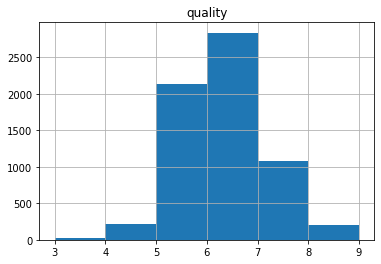

In [3]:
# Before balancing
all_wines.hist('quality', bins = [i for i in range(3,10)])

In [16]:
below_six = [i for i in range(6)]
above_six = [i for i in range(7,10)]

# return the new class name
def reclassify(i):
    if i in below_six:
        return 'below_six'
    if i in above_six:
        return 'above_six'
    else:
        return 'six'

new_classes = all_wines['quality'].apply(func=reclassify)
new_classes.head(20)

0           six
1           six
2           six
3           six
4           six
5           six
6           six
7           six
8           six
9           six
10    below_six
11    below_six
12    below_six
13    above_six
14    below_six
15    above_six
16          six
17    above_six
18          six
19    below_six
Name: quality, dtype: object

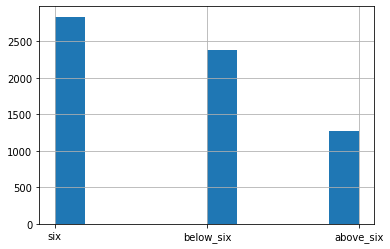

In [5]:
new_classes.hist()

The classes are still imbalanced, but much less so. The smaller number of classes also indicates the limitations in the data set. There are fewer samples that are below or above six. 

## Split the data into training and test sets

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(all_wines.drop('quality',axis=1),all_wines['quality'], 
                                                 test_size=0.33, stratify=all_wines.quality)

y_train_reclass = y_train.apply(func=reclassify)
y_test_reclass = y_test.apply(func=reclassify)

### Check to see counts of each quality level in the split

In [19]:
print('Training data before reclassification:\n',y_train.value_counts().sort_index(),sep='')
print('\nTest data before reclassification:\n',y_test.value_counts().sort_index(),sep='')

Training data before reclassification:
3      20
4     145
5    1432
6    1900
7     723
8     129
9       3
Name: quality, dtype: int64

Test data before reclassification:
3     10
4     71
5    706
6    936
7    356
8     64
9      2
Name: quality, dtype: int64


In [20]:
print('Training data after reclassification:\n',y_train_reclass.value_counts().sort_index(),sep='')
print('\nTest data after reclassification:\n',y_test_reclass.value_counts().sort_index(),sep='')

Training data after reclassification:
above_six     855
below_six    1597
six          1900
Name: quality, dtype: int64

Test data after reclassification:
above_six    422
below_six    787
six          936
Name: quality, dtype: int64


## Center and scale the data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

column_names = all_wines.drop('quality',axis=1).columns
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=column_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=column_names)
X_train_scaled['type_white'] = X_train.reset_index()['type_white']
X_test_scaled['type_white'] = X_test.reset_index()['type_white']

In [10]:
X_train_scaled.to_csv('../data/X_train.csv',index=False)
X_test_scaled.to_csv('../data/X_test.csv',index=False)
y_train.to_csv('../data/y_train.csv',index=False)
y_test.to_csv('../data/y_test.csv',index=False)
y_train_reclass.to_csv('../data/y_train_reclass.csv',index=False)
y_test_reclass.to_csv('../data/y_test_reclass.csv',index=False)